In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r"D:\DS Internship\reviews\reviews_badminton\data.csv")

In [5]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [6]:
df.shape

(8518, 8)

In [7]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [8]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [11]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [12]:
df.drop(columns={'Reviewer Name','Review Title','Place of Review','Up Votes','Down Votes','Month','Ratings'},inplace=True)

In [13]:
df.columns

Index(['Review text'], dtype='object')

In [14]:
df['Review text']

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91949\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [17]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
def polarity(n):
    return analyzer.polarity_scores(n)['compound']

In [19]:
def polarity(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return np.nan  # Return NaN for non-string inputs

In [20]:
df['polarity']=df['Review text'].apply(polarity)

In [21]:
df['polarity']

0       0.9267
1      -0.4767
2      -0.9146
5       0.4404
6       0.8331
         ...  
8495    0.4404
8496   -0.4019
8497    0.3182
8499    0.0000
8507    0.4215
Name: polarity, Length: 8013, dtype: float64

In [22]:
def sentiment(n):
    if n > 0.4:
        return 'Positive'
    else:
        return 'Negative'

In [23]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [24]:
df.head()

,Review text,polarity,sentiment
0,"Nice product, good quality, but price is now r...",0.9267,Positive
1,They didn't supplied Yonex Mavis 350. Outside ...,-0.4767,Negative
2,Worst product. Damaged shuttlecocks packed in ...,-0.9146,Negative
5,Good quality product. Delivered on time.READ MORE,0.4404,Positive
6,BEST PURCHASE It is a good quality and is more...,0.8331,Positive


In [25]:
df.head()

,Review text,polarity,sentiment
0,"Nice product, good quality, but price is now r...",0.9267,Positive
1,They didn't supplied Yonex Mavis 350. Outside ...,-0.4767,Negative
2,Worst product. Damaged shuttlecocks packed in ...,-0.9146,Negative
5,Good quality product. Delivered on time.READ MORE,0.4404,Positive
6,BEST PURCHASE It is a good quality and is more...,0.8331,Positive


In [26]:
df["Review text"]=df["Review text"].str.replace(".READ MORE","")

C:\Users\91949\AppData\Local\Temp\ipykernel_25268\2881371563.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Review text"]=df["Review text"].str.replace(".READ MORE","")


In [27]:
X = df['Review text']
y = df['sentiment']
print(X.shape, y.shape)

(8013,) (8013,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6009,) (6009,)
(2004,) (2004,)


In [29]:
from nltk.corpus import stopwords

In [30]:
sw = stopwords.words('english')

In [31]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
rem=["aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
    "no","not"]

In [33]:
for i in rem:
    sw.remove(i)

In [34]:
info = []
for i in df['Review text']:
    if i not in sw:
        info.append(i)

In [35]:
def remove_stop_words(n):
    return ' '.join([word for word in n.split() if word not in sw])

In [36]:
# Define remove_stop_words function
def remove_stop_words(text):
    if isinstance(text, str):  # Check if text is a string
        return ' '.join([word for word in text.split() if word not in sw])
    else:
        return ''  # Return empty string for non-string inputs

df['Review text'] = df['Review text'].apply(remove_stop_words)



In [37]:
import re
import emoji

In [38]:
def preprocess(raw_text, flag):
    if isinstance(raw_text, str):  
        # Removing special characters and digits
        text = re.sub("[^a-zA-Z]", " ", raw_text)
        text = emoji.demojize(text).replace(':', ' ')
        # Change text to lowercase
        text = text.lower()
        return text
    else:
        return np.nan  # Return NaN for non-string inputs


In [39]:
df['Review text']=df['Review text'].apply(lambda x:preprocess(x,'stem'))

In [40]:
from nltk.stem import WordNetLemmatizer

In [41]:
lemma = WordNetLemmatizer()

In [42]:
def lemmatizer(n):
    lemmatized = [lemma.lemmatize(i) for i in n]
    return "".join(lemmatized)

In [43]:
df['Review text'] = df['Review text'].apply(lemmatizer)

In [44]:
df.head()

,Review text,polarity,sentiment
0,nice product good quality price rising bad s...,0.9267,Positive
1,they didn t supplied yonex mavis outside ...,-0.4767,Negative
2,worst product damaged shuttlecocks packed new...,-0.9146,Negative
5,good quality product delivered time,0.4404,Positive
6,best purchase it good quality durable average ...,0.8331,Positive


In [45]:
df.drop('polarity',axis=1,inplace=True)

<Axes: >

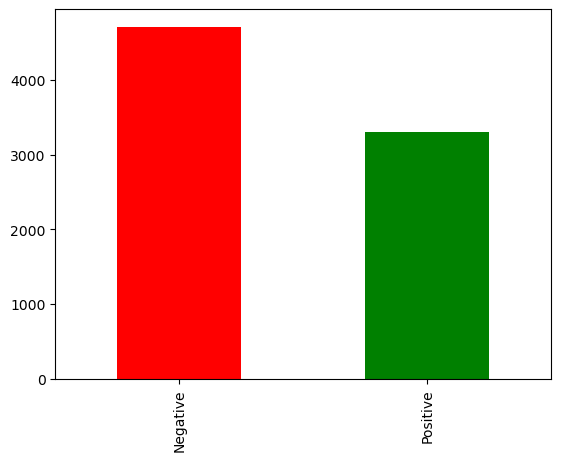

In [46]:
df['sentiment'].value_counts().plot(kind='bar',color=['red','green'])

## Converting Text to Numerical vectors - BOW Representation

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
vector = CountVectorizer()

In [49]:
#vect = CountVectorizer(preprocessor=clean_text)


X_train_dtm = vector.fit_transform(X_train)

print(X_train_dtm.shape)

(6009, 2710)


In [50]:
X_test_dtm = vector.transform(X_test)

print(X_test_dtm.shape)

(2004, 2710)


In [51]:
# print(Review_text)

In [52]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() 
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [53]:
from wordcloud import WordCloud

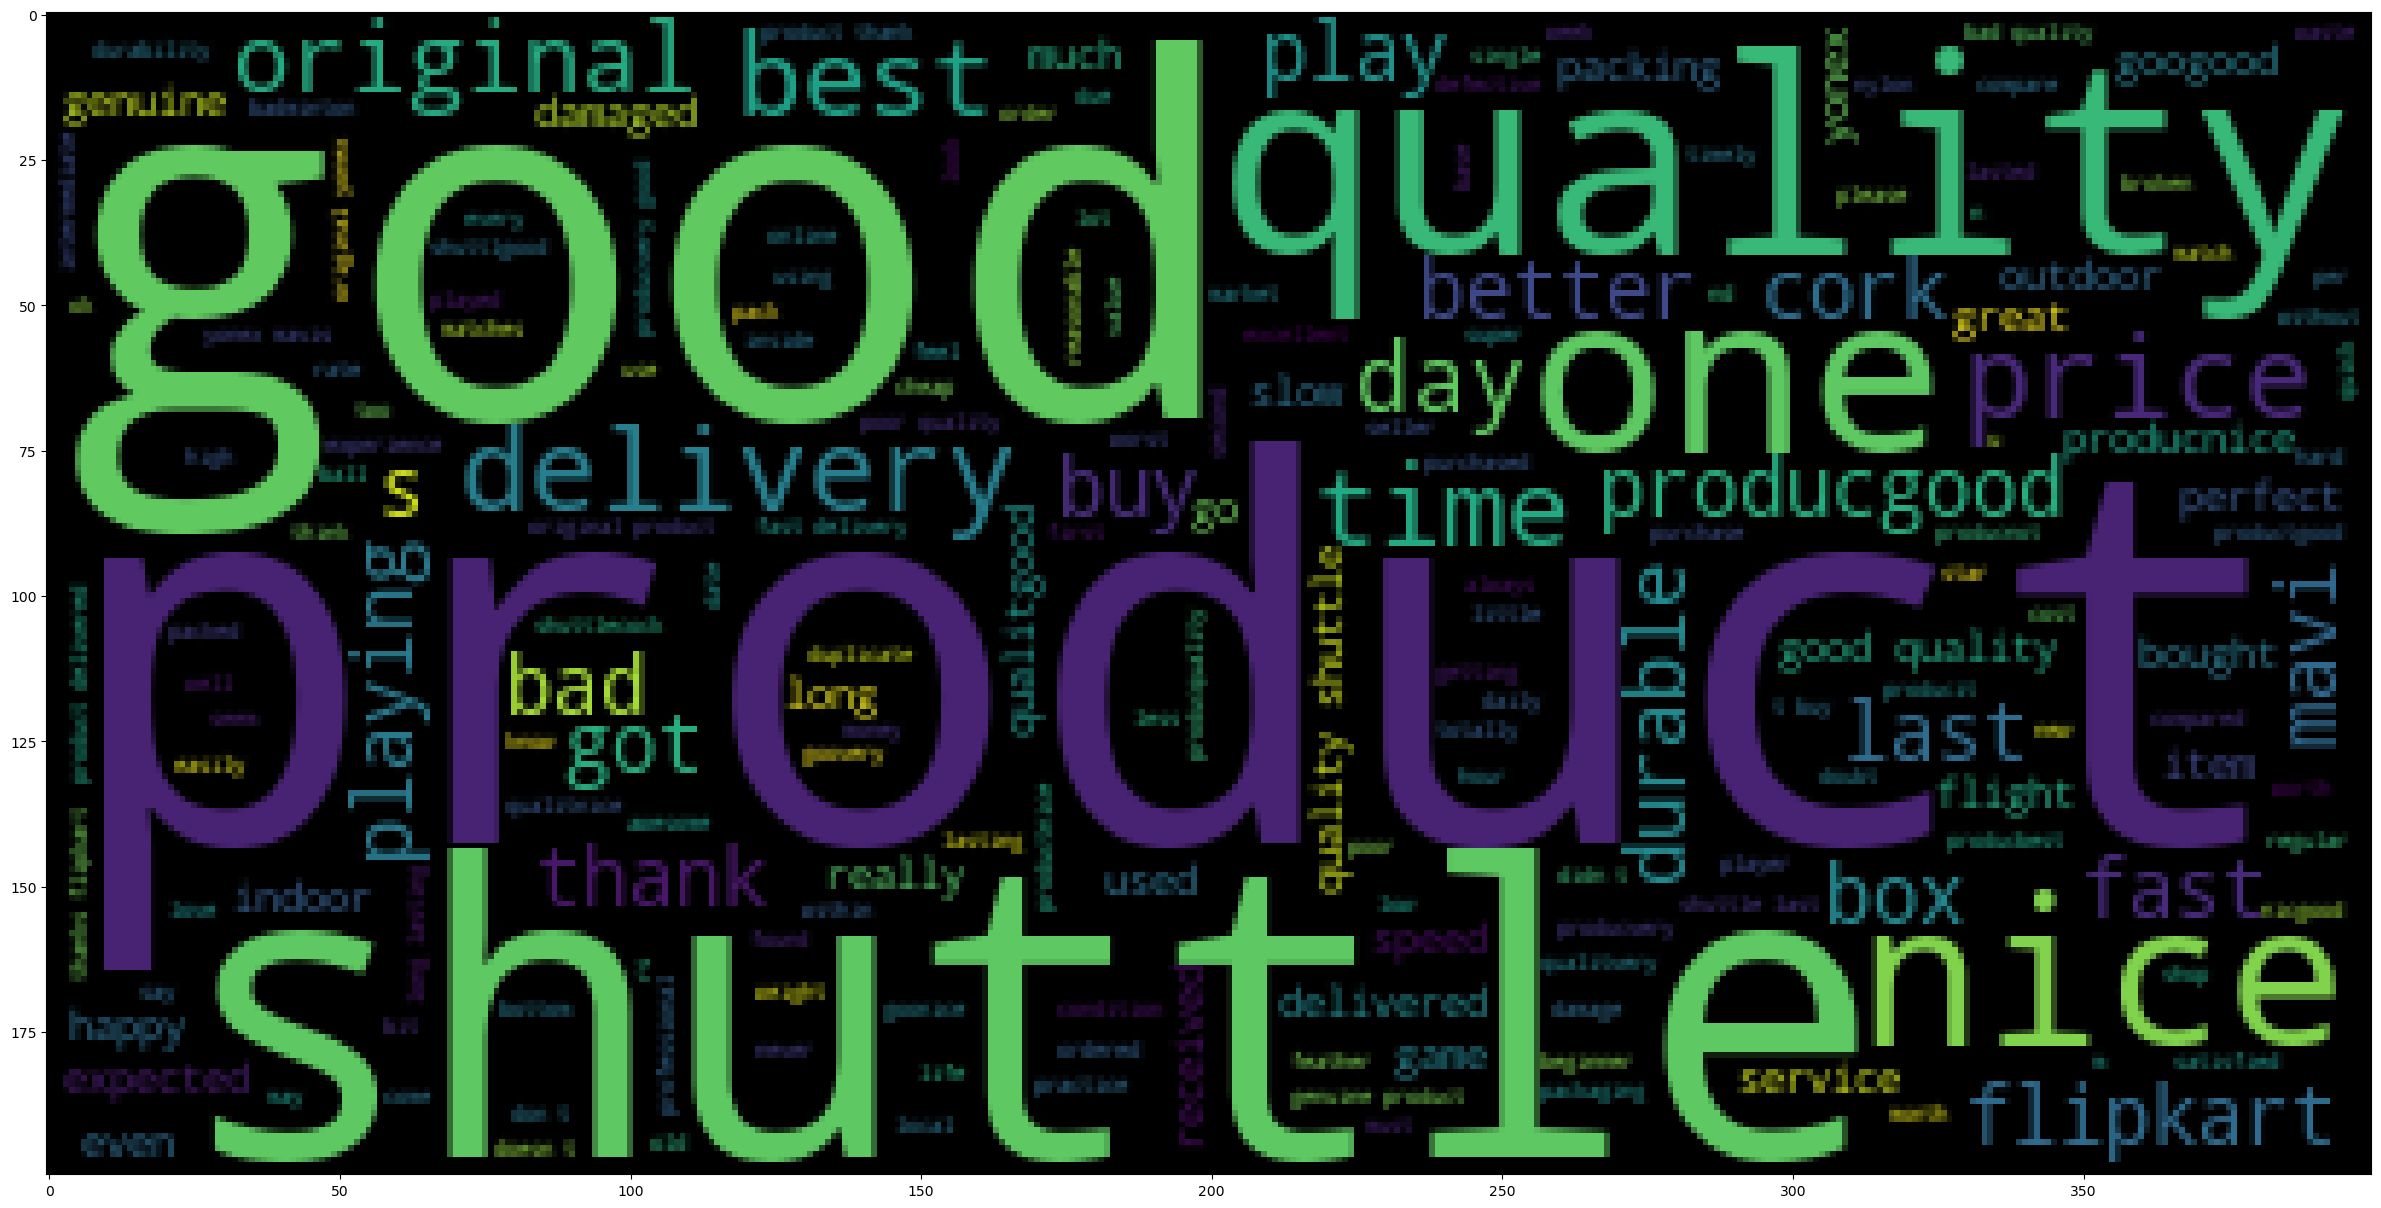

In [54]:
text = "".join(df['Review text'].values.tolist())
data=WordCloud().generate(text)
plt.figure(1,figsize=(30,20))
plt.imshow(data)
plt.show()

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay

In [56]:
pipe=Pipeline([('Vectorization',CountVectorizer(stop_words='english')),
              ("Estimator",MultinomialNB(alpha=3))])

In [58]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorization', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=3))])

In [59]:
y_pred = pipe.predict(X_test)

In [60]:
y_pred

array(['Positive', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Negative'], dtype='<U8')

In [61]:
accuracy_score(y_pred,y_test)

0.8772455089820359

In [62]:
f1_score(y_pred, y_test, average='weighted')

0.8764311785128147

## Pickle file

In [63]:
import pickle

In [64]:
pickle.dump(pipe,open("flipkart_analysis.pkl",'wb'))

In [65]:
import os
os.getcwd()

'C:\\Users\\91949\\Data Science Internship'

In [66]:
predict = pickle.load(open("flipkart_analysis.pkl",'rb'))

In [67]:
predict.predict(["waste of buying the product"])[0]

'Negative'

In [68]:
predict.predict(["The best product to buy"])[0]

'Positive'